In [ ]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
"""
Sources:
https://github.com/numerical-mooc/assignment-bank/blob/master/Lessons.and.Assignments/Predator.Prey.Model/Predator.Prey.Model.ipynb
"""

In [ ]:
# Define Equations and equation parameters 
# initial parameter values chosen based off example code

alpha = 1         # birth rate of prey (without any predators present)
beta = 1.2        # rate at which predators attack prey
c = .85           # capture efficiency of predators
gamma = c * beta  # rate of new offspring of predators
delta = 4         # death rate of preadtors (without any other factors present)

T = 20            # final time T (arbitrary)
N = 10000         # number of time steps
r0 = 10           # starting number of prey
f0 = 2            # starting number of predators

#1. Base Lotka–Volterra Model

Numerical Approximation of Standard Lotka-Volterra Model



In [ ]:
# Define function for Runge-Kutta Method
def RK4(N, T, r0, f0, func):
  """Returns Runge–Kutta method approximations for Lotka–Volterra system 
     at each time step

  Parameters
  ----------
  N : int
      number of time steps.
  T : int
      final time.
  r0 : int
      initial number of prey.
  f0 : int
      initial number of predator.
  func : function
      function that returns RHS of equations Lotka–Volterra system.
      
  Returns
  -------
  func_steps : ndarry of floats
      array containing numerical approximations of Lotka–Volterra system.
  """

  dt = T / N    # Change in time per step
  
  # Initalize array for solution at each time step
  func_steps = np.zeros((N + 1, 2))
  # Set Inital values
  func_steps[0] = np.array((r0, f0))


  # Compute Runge-Kutta approximations
  for i_t in range(N):

    k1 = func(func_steps[i_t])
    k2 = func(func_steps[i_t] + (.5 * k1 * dt))
    k3 = func(func_steps[i_t] + (.5 * k2 * dt))
    k4 = func(func_steps[i_t] + (k3 * dt))

    func_steps[i_t + 1] = func_steps[i_t] + (dt / 6) * (k1 + 2 * (k2 + k3) + k4)

  return func_steps

In [ ]:
# Function for Base Lotka–Volterra System
def d_LV(curr):
  """Returns the rate of change of species' populations' 
     according to Lotka–Volterra Model.

  Parameters
  ----------
  curr : array of floats
      array containing the solution at current time.
      
  Returns
  -------
  dcurr_dt : array of float
      array containing rate of change of species' populations' of system.
  """
  r = curr[0] # prey population at current time
  f = curr[1] # predator population at current time

  # Compute RHS of equations
  return np.array([(alpha * r) - (beta * r * f), 
                   (gamma * r * f) - (delta * f)])

In [ ]:
# Execute Model / Numerical Method
rk4_method = RK4(N, T, r0, f0, d_LV)

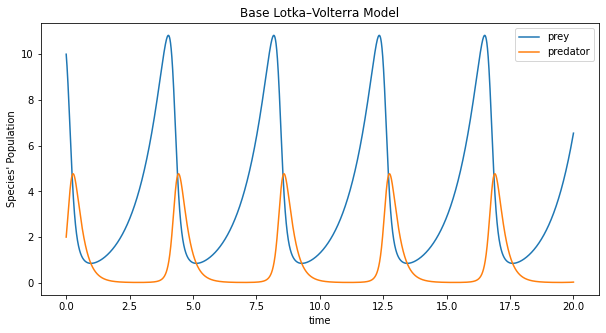

In [ ]:
# Plot Points over time
prey = rk4_method[:, 0]
predator = rk4_method[:, 1]
time = np.linspace(0, T, N + 1)  # time steps

plt.figure(figsize = (10, 5))
plt.plot(time, prey, label = 'prey')
plt.plot(time, predator, label = 'predator')
plt.legend(loc = 'upper right')

# labels
plt.xlabel("time")
plt.ylabel("Species' Population")
plt.title("Base Lotka–Volterra Model");

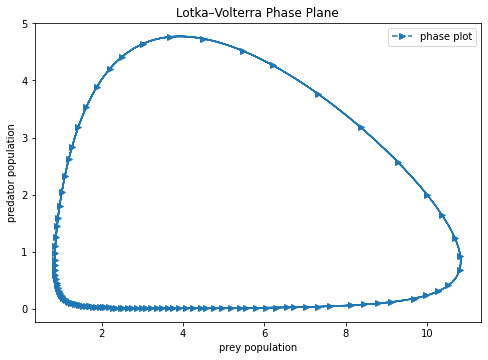

In [ ]:
# Plot phase plane of species' populations
plt.figure(figsize = (8, 5.5))
plt.plot(prey, predator, '-->', markevery = 100, label = 'phase plot')
plt.legend(loc = 'upper right')

# labels
plt.xlabel("prey population")
plt.ylabel("predator population")
plt.title("Lotka–Volterra Phase Plane");

## 1.1 Carrying Capacity

In [ ]:

# Redefine Lotka-Volterra Model with carrying capacity
def d_LVk(curr):
  """Returns the rate of change of species' populations' 
     according to Lotka–Volterra Model, with prey carrying capacity.

  Parameters
  ----------
  curr : array of floats
      array containing the solution at current time.
      
  Returns
  -------
  dcurr_dt : array of float
      array containing the solutions of Lotka–Volterra system.
  """
  r = curr[0] # prey population at current time
  f = curr[1] # predator population at current time

  # Compute RHS of equations
  return np.array([(alpha * r) * (1 - (r / K)) - (beta * r * f), 
                   (gamma * r * f) - (delta * f)])


Prey Carrying Capacity K = 20:


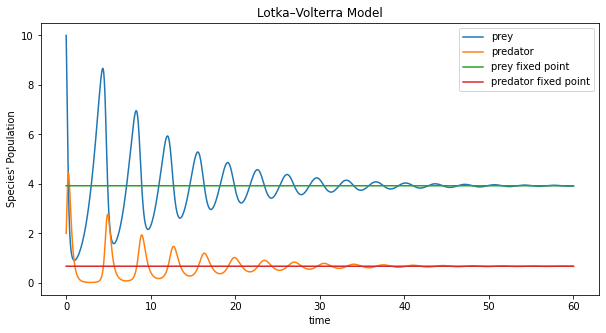

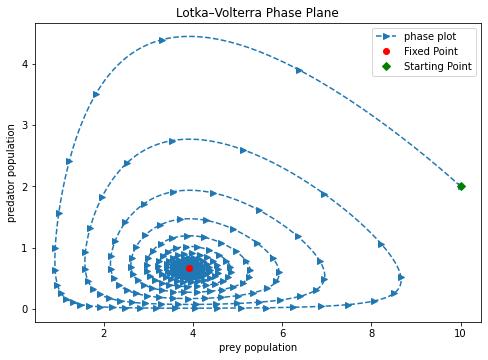

In [ ]:
# Execute Model / Numerical Method
K = 20  # carrying capacity
T = 60
rk4_method = RK4(N, T, r0, f0, d_LVk)

# Plot Points over time
print(f'Prey Carrying Capacity K = {K}:')
prey = rk4_method[:, 0]
predator = rk4_method[:, 1]
time = np.linspace(0, T, N + 1)  # time steps

plt.figure(figsize = (10, 5))
plt.plot(time, prey, label = 'prey')
plt.plot(time, predator, label = 'predator')

# Calculate and plot non-trivial fixed points of system
x_fp = np.zeros(N + 1) + (delta / gamma)
y_fp = np.zeros(N + 1) + (alpha / beta) * (1 - (delta / (gamma * K))) 

plt.plot(time, x_fp, label = 'prey fixed point')
plt.plot(time, y_fp, label = 'predator fixed point')
plt.legend(loc='upper right')

# labels
plt.xlabel("time")
plt.ylabel("Species' Population")
plt.title("Lotka–Volterra Model")
plt.show()

# Plot phase plane
plt.figure(figsize = (8, 5.5))
plt.plot(prey, predator, '-->', markevery = 25, label = 'phase plot')
plt.plot(x_fp[0], y_fp[0], 'ro', label = 'Fixed Point')
plt.plot(prey[0], predator[0], 'gD', label = 'Starting Point')
plt.legend(loc = 'upper right')

# labels
plt.xlabel("prey population")
plt.ylabel("predator population")
plt.title("Lotka–Volterra Phase Plane");

Prey Carrying Capacity K = 10:


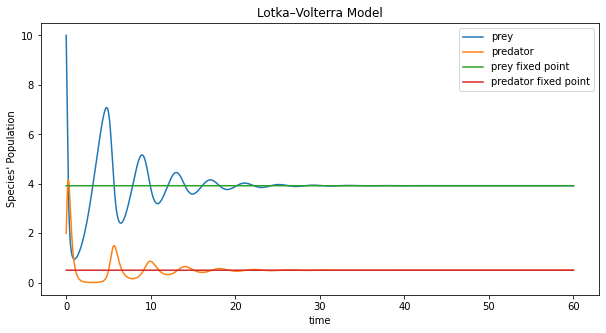

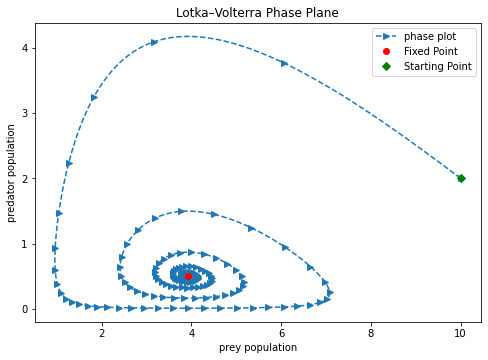

In [ ]:
# Execute Model / Numerical Method
K = 10  # carrying capacity
T = 60
rk4_method = RK4(N, T, r0, f0, d_LVk)

# Plot Points over time
print(f'Prey Carrying Capacity K = {K}:')
prey = rk4_method[:, 0]
predator = rk4_method[:, 1]
time = np.linspace(0, T, N + 1)  # time steps

plt.figure(figsize = (10, 5))
plt.plot(time, prey, label = 'prey')
plt.plot(time, predator, label = 'predator')

# Calculate and plot non-trivial fixed points of system
x_fp = np.zeros(N + 1) + (delta / gamma)
y_fp = np.zeros(N + 1) + (alpha / beta) * (1 - (delta / (gamma * K))) 

plt.plot(time, x_fp, label = 'prey fixed point')
plt.plot(time, y_fp, label = 'predator fixed point')
plt.legend(loc='upper right')

# labels
plt.xlabel("time")
plt.ylabel("Species' Population")
plt.title("Lotka–Volterra Model")
plt.show()

# Plot phase plane
plt.figure(figsize = (8, 5.5))
plt.plot(prey, predator, '-->', markevery = 25, label = 'phase plot')
plt.plot(x_fp[0], y_fp[0], 'ro', label = 'Fixed Point')
plt.plot(prey[0], predator[0], 'gD', label = 'Starting Point')
plt.legend(loc = 'upper right')

# labels
plt.xlabel("prey population")
plt.ylabel("predator population")
plt.title("Lotka–Volterra Phase Plane");

Prey Carrying Capacity K = 5:


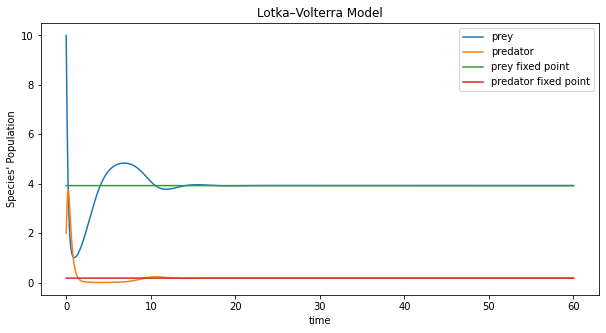

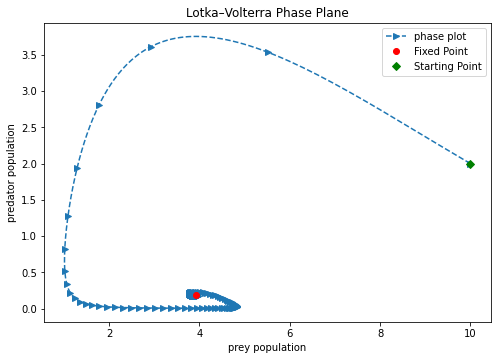

In [ ]:
# Execute Model / Method
K = 5   # carrying capacity
T = 60
rk4_method = RK4(N, T, r0, f0, d_LVk)

# Plot Points over time
print(f'Prey Carrying Capacity K = {K}:')
prey = rk4_method[:, 0]
predator = rk4_method[:, 1]
time = np.linspace(0, T, N + 1)  # time steps

plt.figure(figsize = (10, 5))
plt.plot(time, prey, label = 'prey')
plt.plot(time, predator, label = 'predator')

# Calculate and plot non-trivial fixed points of system
x_fp = np.zeros(N + 1) + (delta / gamma)
y_fp = np.zeros(N + 1) + (alpha / beta) * (1 - (delta / (gamma * K))) 

plt.plot(time, x_fp, label = 'prey fixed point')
plt.plot(time, y_fp, label = 'predator fixed point')
plt.legend(loc='upper right')

# labels
plt.xlabel("time")
plt.ylabel("Species' Population")
plt.title("Lotka–Volterra Model")
plt.show()

# Plot phase plane
plt.figure(figsize = (8, 5.5))
plt.plot(prey, predator, '-->', markevery = 25, label = 'phase plot')
plt.plot(x_fp[0], y_fp[0], 'ro', label = 'Fixed Point')
plt.plot(prey[0], predator[0], 'gD', label = 'Starting Point')
plt.legend(loc = 'upper right')

# labels
plt.xlabel("prey population")
plt.ylabel("predator population")
plt.title("Lotka–Volterra Phase Plane");

# 2. Adding Allee Effect


In [ ]:
# define Lotka–Volterra functions with Allee Effect 
#Allee Effect on prey
def d_Allee_prey(curr):
  """Returns the rate of change of species' populations' 
     according to LV Model, with Alle effect on prey.

  Parameters
  ----------
  curr : array of floats
      array containing the solution at current time.
      
  Returns
  -------
  dcurr_dt : array of float
      array containing the solutions of LV system.
  """
  r = curr[0] # prey population at time n
  f = curr[1] # predator population at time n
  
  # Compute RHS of equations
  return np.array([(alpha * r * (r / (r + a))) * (1 - (r / K)) - (beta * r * f), 
                   (gamma * r * f) - (delta * f)])

#Allee Effect on predator
def d_Allee_pred(curr):
  """Returns the rate of change of species' populations' 
     according to LV Model, with Alle effect on predator.

  Parameters
  ----------
  curr : array of floats
      array containing the solution at current time.
      
  Returns
  -------
  dcurr_dt : array of float
      array containing the solutions of LV system.
  """
  r = curr[0] # prey population at time n
  f = curr[1] # predator population at time n

  # Compute RHS of equations
  return np.array([(alpha * r) * (1 - (r / K)) - (beta * r * f), 
                   (gamma * r * f * (f / (f + a))) - (delta * f)])


Alle Effect on Prey A = 5:


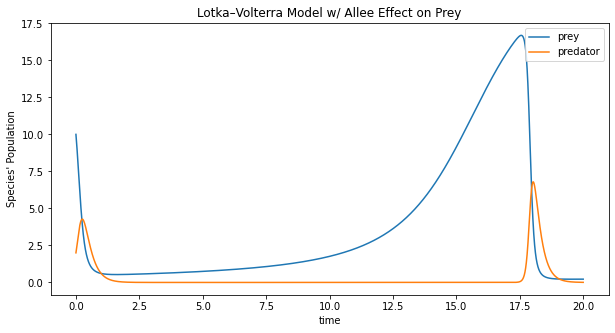

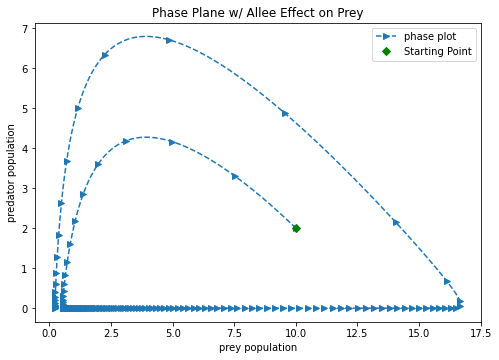

In [ ]:
# Execute Model / Method for Allee effect on prey
K = 20 # Carrying capacity
a = 5 # Allee effect assumption
#T = 20 #final time
rk4_method = RK4(N, T, r0, f0, d_Allee_prey)

# Plot Points over time
print(f'Alle Effect on Prey A = {a}:')
prey = rk4_method[:, 0]
predator = rk4_method[:, 1]
time = np.linspace(0, T, N + 1)  # time steps

plt.figure(figsize = (10, 5))
plt.plot(time, prey, label = 'prey')
plt.plot(time, predator, label = 'predator')
plt.legend(loc = 'upper right')

# labels
plt.xlabel("time")
plt.ylabel("Species' Population")
plt.title("Lotka–Volterra Model w/ Allee Effect on Prey")

# Plot phase plane
plt.figure(figsize = (8, 5.5))
plt.plot(prey, predator,'-->', markevery = 50, label = 'phase plot')
plt.plot(prey[0], predator[0], 'gD', label = 'Starting Point')
plt.legend(loc = 'upper right')

# labels
plt.xlabel("prey population")
plt.ylabel("predator population")
plt.title("Phase Plane w/ Allee Effect on Prey");

Alle Effect on Predator A = 5:


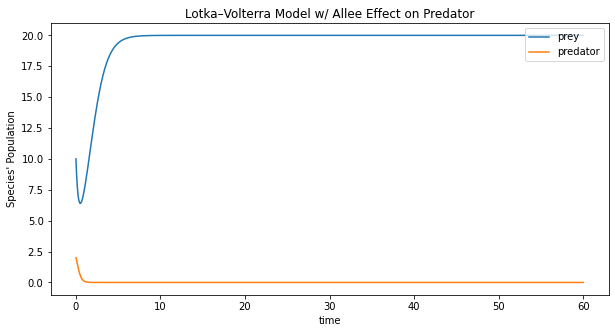

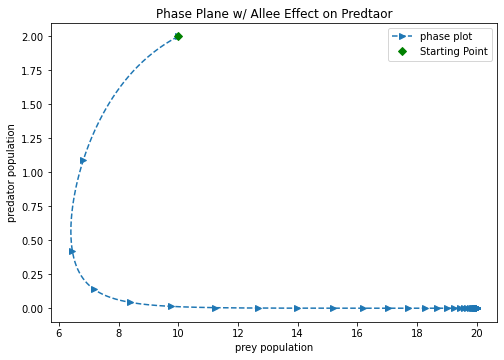

In [ ]:
# Execute Model / Method for Allee effect on predator
rk4_method = RK4(N, T, r0, f0, d_Allee_pred)

# Plot Points over time
print(f'Alle Effect on Predator A = {a}:')
prey = rk4_method[:, 0]
predator = rk4_method[:, 1]
time = np.linspace(0, T, N + 1)  # time steps

plt.figure(figsize = (10, 5))
plt.plot(time, prey, label = 'prey')
plt.plot(time, predator, label = 'predator')
plt.legend(loc = 'upper right')

# labels
plt.xlabel("time")
plt.ylabel("Species' Population")
plt.title("Lotka–Volterra Model w/ Allee Effect on Predator")

# Plot phase plane
plt.figure(figsize = (8, 5.5))
plt.plot(prey, predator,'-->', markevery = 50, label = 'phase plot')
plt.plot(prey[0], predator[0], 'gD', label = 'Starting Point')
plt.legend(loc = 'upper right')

# labels
plt.xlabel("prey population")
plt.ylabel("predator population")
plt.title("Phase Plane w/ Allee Effect on Predtaor");

#3. Climate Change


In [ ]:
#Allee effect assumptions at A=100, B=50 
a= 100 #Allee effect on fruit flies
#a= 50 #Allee effect on spiders

# Lotka-Volterra with climate paramters
def d_LV_climate(curr, Temp):
  """Returns the rate of change of species' populations' 
     according to LV model and climate impacts

  Parameters
  -----------
  curr : array of floats
      array containing the solution at current time

  Temp: float
      temperature at current time
  
  Returns
  -----------
  dcurr_dt : array of float
  array containing the solutions of Lotka-Volterra system with Temperature impacts
  """
  
  ff = curr[0]  # fruit fly population at current time
  s = curr[1]   # spider population at current time
  
  # Defining alpha, beta and delta in terms of Temp
  ## Alpha
  alpha_0 = math.exp(32.39)   # Normalization constant 
  D = 0.2615                  # average mass of fruit fly in mg
  b_alpha = -0.25             # allometric exponent for birth rate of fruit flies
  E_alpha = -0.84             # activation energy in eV (electron Volts)
  k = 8.62 * (10 ** (-5))     # Boltzmann's Constant (eV/K), K - Kelvin
  
  alpha = alpha_0 * (D ** (b_alpha)) * math.exp(E_alpha / (k * Temp))

  ## Beta = Correction Factor * Ingestion Rate (I)
  m = 1                     # Average mass of spider in g
  C_f = 1                   # Correction Factor
  i_0 = math.exp(-14.34)    # Normalization Constant
  b_I = -0.63               # Allometric exponent for Ingestion rate
  E_I = -0.09               # Activation energy in eV
  
  beta = C_f * i_0 * (m ** (b_I)) * math.exp(-E_I / (k * Temp))

  c = 1/0.85
  gamma = c * beta
   
  ## Delta = Correction Factor * Metabolic rate (M)
  C_r = 1                  # Correction Factor
  m_0 = math.exp(23.62)    # Normalization Constant
  b_M = 0.46               # Allometric Exponent for Metabolic rate
  E_M = 0.8                # Activation energy in eV
  
  delta = C_r * m_0 * (m ** (b_M)) * math.exp(-E_M / (k * Temp))
  
  ## Carrying capacity - K
  sigma_0 = 600          # Net primary productivity of habitat in g/(m^2 year^2)
  E_sigma = -0.35        # Activation energy in eV
  T_0 = 282.65           # Temperature for sigma_0
  
  sigma = sigma_0 * math.exp((E_sigma * (T_0 - Temp)) / (k * Temp * T_0))
  
  K_0 = math.exp(-31.15)  # Normalization Constant
  b_K = -0.72             # Constant Exponent
  E_K = 0.71              # Activation energy in eV
  z = 1.03                # Constant exponent
  tl_0 = -2.68            # Constant exponent
  tl = 1.5                # Trophic Level of prey
  
  K = K_0 * (D ** (b_K)) * math.exp(E_K / (k * Temp)) * (sigma ** z) * math.exp(tl_0 * (tl-1))
  
  # Compute RHS of equations
  #return np.array([(alpha * ff ) * (1 - (ff / K)) - (beta * ff * s),
   #                (gamma * ff * s) - (delta * s)])
  
  #Allee effect equation= ('species' / ('species' + a))
  
  #Function with Allee effect on fruit flies 
  return np.array([(alpha * ff ) * (ff / (ff + a))* (1 - (ff / K)) - (beta * ff * s),
                   (gamma * ff * s) - (delta * s)])

  #Allee effect on spiders
  #return np.array([(alpha * ff ) * (1 - (ff / K)) - (beta * ff * s),
                   #(gamma * ff * s*(s/ (s + a))) - (delta * s)])  
              

In [ ]:
# Constant Climate
def RK4_3D(N, T, ff0, s0, Temp0, func):
  """Returns Runge-Kutta method approximations for LV system at each time step
  with climate variables (no climate change)

  Parameters
  ----------
  N : int
      number of time steps
  T : int
      final time
  ff0 : int
      initial number of fruit flies
  s0 : int
      initial number of spiders
  Temp0 : int
      initial temperature
  func : function
      function that returns RHS of equations in  system
  
  Returns
  -------
  func_steps : ndarray of floats
       array containing numerical approximations system
  """

  dt = T / N     # Change in time per step

  # Initialize array for solution at each time step
  func_steps = np.zeros((N + 1, 2))
  # Set Initial Values
  func_steps[0] = np.array((ff0, s0))

  # Compute Runge-Kutta approximations
  for i_t in range(N):
    
    k1 = func(func_steps[i_t], Temp0)
    k2 = func(func_steps[i_t] + (.5 * k1 * dt), Temp0)
    k3 = func(func_steps[i_t] + (.5 * k2 * dt), Temp0)
    k4 = func(func_steps[i_t] + (k3 * dt), Temp0)

    func_steps[i_t + 1] = func_steps[i_t] + (dt / 6) * (k1 + 2 * (k2 + k3) + k4)

  
  return func_steps

In [ ]:
# Defining a function for RK4 method for a 3-D system
# With changing climate
def RK4_3D_cc(N, T, ff0, s0, Temp0, func):
  """Returns Runge-Kutta method approximations for LV system at each time step
  with climate variables (climate change)

  Parameters
  ----------
  N : int
      number of time steps
  T : int
      final time
  ff0 : int
      initial number of fruit flies
  s0 : int
      initial number of spiders
  Temp0 : int
      initial temperature
  func : function
      function that returns RHS of equations in the system
  
  Returns
  -------
  func_steps : ndarray of floats
       array containing numerical approximations of system
  """

  dt = T / N     # Change in time per step

  # Initialize array for solutions and temperature at each time step
  func_steps = np.zeros((N + 1, 2))
  temp = np.zeros((N + 1, 1))

  # Set Initial Values
  func_steps[0], temp[0] = np.array((ff0, s0)), Temp0

  #Compute Runge-Kutta approximations
  for i_t in range(N):
    
    k1 = func(func_steps[i_t], temp[i_t])
    k2 = func(func_steps[i_t] + (.5 * k1 * dt), temp[i_t])
    k3 = func(func_steps[i_t] + (.5 * k2 * dt), temp[i_t])
    k4 = func(func_steps[i_t] + (k3 * dt), temp[i_t])

    func_steps[i_t + 1] = func_steps[i_t] + (dt / 6) * (k1 + 2 * (k2 + k3) + k4)

    # temperature increase at each time step
    temp[i_t + 1] = temp[i_t] + .18
  
  return func_steps, temp

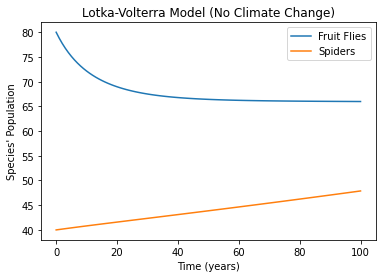

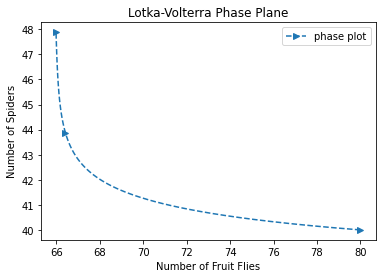

In [ ]:
# No climate change

# Execute Model / Method
T = 100           # Final Time
N = 100           # Number of time steps
ff0 = 80         # Starting number of fruit flies
s0 = 40          # Starting number of spiders
Temp0 = 282.65    # Starting temperature in Kelvin 

rk4_3d = RK4_3D(N, T, ff0, s0, Temp0, d_LV_climate)

# Plot points over Time
Fruit_Flies = rk4_3d[:, 0]
Spiders = rk4_3d[:, 1]
time = np.linspace(0, T, N + 1)  # Time steps

plt.plot(time, Fruit_Flies, label = 'Fruit Flies')
plt.plot(time, Spiders, label = 'Spiders')
plt.legend(loc = 'upper right')

# labels
plt.xlabel("Time (years)")
plt.ylabel("Species' Population")
plt.title("Lotka-Volterra Model (No Climate Change)")
plt.show()

# Plot phase plane
plt.plot(Fruit_Flies,Spiders,'-->', markevery = 50, label = 'phase plot') 
plt.legend(loc = 'upper right')

# labels
plt.xlabel("Number of Fruit Flies")
plt.ylabel("Number of Spiders")
plt.title("Lotka-Volterra Phase Plane")
plt.show()

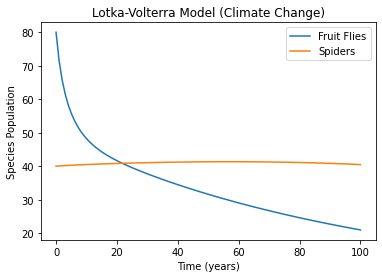

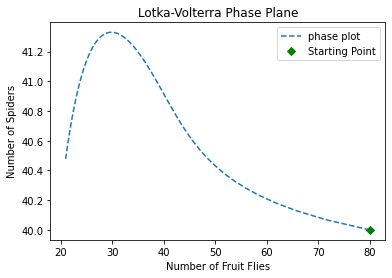

In [ ]:
# With climate change

# Execute Model / Method
T = 100       # Final Time
N = 100       # Number of time steps
ff0 = 80      # Starting number of fruit flies
s0 = 40       # Starting number of spiders
Temp0 = 290   # Starting temperature in Kelvin 
#Temp0 = 282.65   # Another starting temperature in Kelvin

rk4_3d = RK4_3D_cc(N, T, ff0, s0, Temp0, d_LV_climate)

# Plot points over Time
Fruit_Flies = rk4_3d[0][:,0]
Spiders = rk4_3d[0][:,1]
time = np.linspace(0, T, N + 1)  # Time steps

plt.plot(time, Fruit_Flies, label = 'Fruit Flies')
plt.plot(time, Spiders, label = 'Spiders')
plt.legend(loc = 'upper right')

# labels
plt.xlabel("Time (years)")
plt.ylabel("Species Population")
plt.title("Lotka-Volterra Model (Climate Change)")
plt.show()

#Plot phase plane
plt.plot(Fruit_Flies,Spiders,'--', markevery = 50, label = 'phase plot') 
plt.plot(Fruit_Flies[0], Spiders[0], 'gD', label = 'Starting Point')
plt.legend(loc = 'upper right')

# labels
#plt.xlim([20,80])
#plt.ylim([38.5,40.5])
plt.xlabel("Number of Fruit Flies")
plt.ylabel("Number of Spiders")
plt.title("Lotka-Volterra Phase Plane")
plt.show()